<a href="https://colab.research.google.com/github/CHRISTINEMUTHEE/Autolib_Hypothesis-testing/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_Christine_Muthee_Hypothesis_Testing__Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHESIS TESTING REPORT.

# 1. Objective 




### a.) Understanding electric car usage in Autolib electric car sharing service company.


# 2. Problem Statement

### a.) The data provided contains the data aggregation by date and location (postal code) of the number of events on autolib company.This includes

*  Car sharing
*  Recharging

### b.) I will investigate claims about "blue cars" in Autolib services.
### c.) My hypothesis on locations:
H0: There in no difference in the total number of cars taken in location 1 and Location 2
H1: There is a significant difference in the total number of cars taken in different locations.
### e.) This hypothesis is important because we will be able to understand the events carried out in different locations thus giving us insights on whether certain locations are more active than others in terms of services


## 3.) Data description


### This dataset contains the following parameters that will be instrumental in carrying out the study:
*   The postal code of the areas in paris
*   The date of the row aggregations,with an identifier dividing the days to weekdays and weekends.
*   Blue cars taken in that date in the area.
*   Blue cars returned that date in that area.

### It is safe to note that the data from the Autolib car sharing services is collected on a daily basis for specific locations. 





### Exploratory Data Analysis.

In [218]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm


### Data cleaning proceedure.

In [219]:
# Reading the dataset to see its content.
Dataset_URL='http://bit.ly/DSCoreAutolibDataset'
Autolib_df=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
Autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [220]:
# Checking the tail of the dataset
Autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


* Getting rid of unnecessary columns.




In [221]:
# Utilib data and slots are not being used in my hypothesis testing.
Autolib_df1=Autolib_df.drop(Autolib_df.iloc[:,7:13].columns,axis=1)
Autolib_df1.drop('n_daily_data_points',axis=1,inplace=True)

In [222]:
Autolib_df1.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [223]:
# Changing column name for ease in reference
Autolib_df1['dayOfWeek']=Autolib_df1['dayOfWeek'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

### Univariate analysis
Outlier detection


In [224]:
# Function to view outliers in categorical data
def counts(data,column):
  plt.figure(figsize=(13,4))
  sns.countplot(data[column],order=data[column].value_counts().sort_values(ascending=True).index);
  plt.xticks(rotation=90);
  plt.xlabel(column)
  plt.ylabel('values of'+format(column))
  plt.title("A frequency distribution of"+format(column)+"counts")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


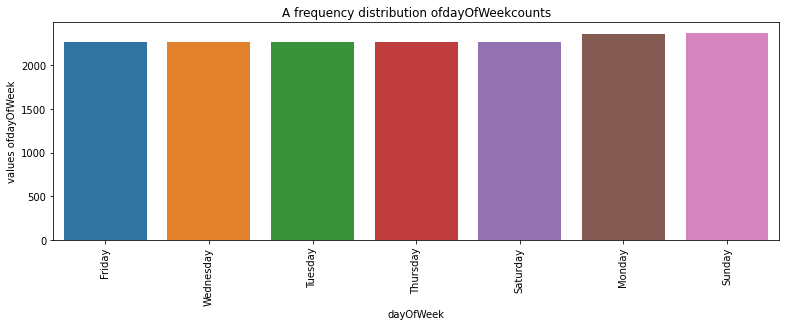

In [225]:
#Checking for outliers in daytype category
counts(Autolib_df1,'dayOfWeek')
# There are no outliers in the days of the week

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


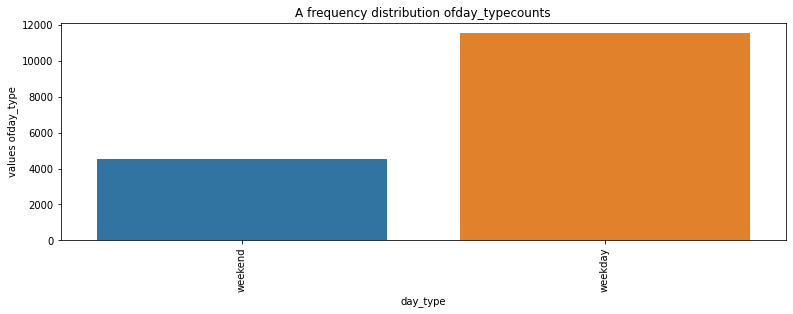

In [226]:
# Checking outliers in the days of the week columns
counts(Autolib_df1,'day_type')
# There are no outliers in the day type category
# Week day count seem to be higher than the weekend count.

In [227]:
def distribution(data,column):
  plt.figure(figsize=(13,4))
  sns.distplot(data[column],kde=True)
  plt.xlabel(column)
  plt.ylabel(format(column)+'distribution')
  plt.title('The distribution of '+format(column))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


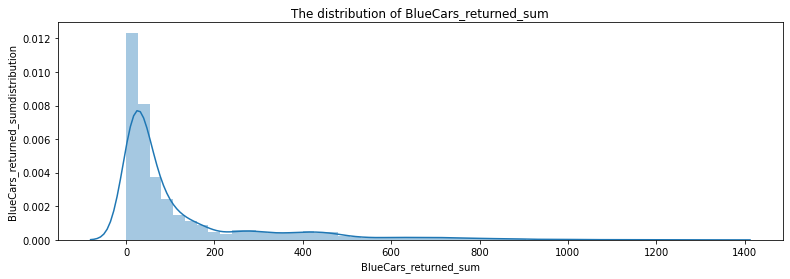

In [228]:
# Checking for outliers in the aggregation of the bluecars returned per day
distribution(Autolib_df1,'BlueCars_returned_sum')
# The distribution is skewed positively

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


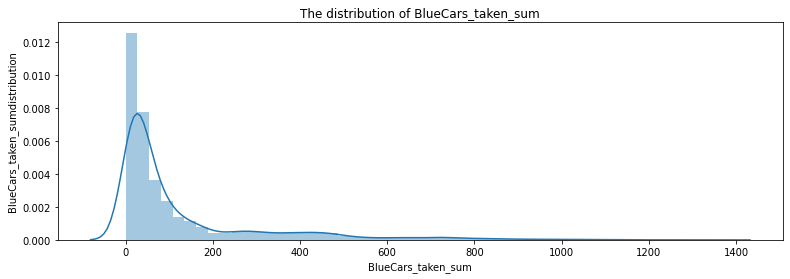

In [229]:
# Checking for outliers in the aggregation of the bluecars taken per day
distribution(Autolib_df1,'BlueCars_taken_sum')
# Our data is positively skekwed with the values concentrated towards zero

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


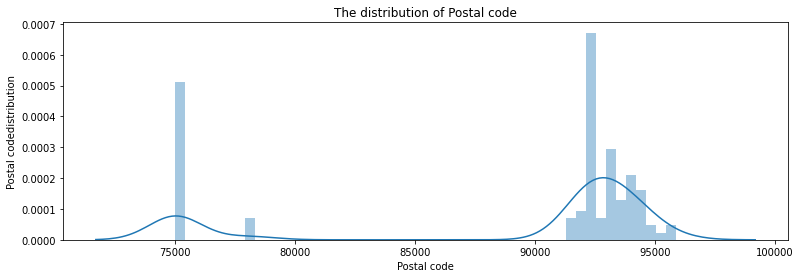

In [230]:
# Checking for outliers in the Postal code distribution
distribution(Autolib_df1,'Postal code')
# There are two separate distributions in the data which look normal

Anomaly detection

In [231]:
# An anomaly has been detected in the postal code distribution.
# There is missing data between 80000 and 90000. Viewing the column to countercheck missing values.
print(Autolib_df1.shape[0])
# Checking missing values
Autolib_df1.isnull().any()
# We dont have missing values in the dataset.

16085


Postal code              False
date                     False
dayOfWeek                False
day_type                 False
BlueCars_taken_sum       False
BlueCars_returned_sum    False
dtype: bool

In [232]:
Autolib_df1['Postal code'].unique()
# This can just be attributed to the numbering of the postal codes and not missing values.

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

Missing values

In [233]:
# Checking for missing data
Autolib_df1.isnull().any().sum()

0

In [234]:
# Checking duplicated rows
Autolib_df1.duplicated().any()

False

### Bivariate analysis

Relationships within the dataset

In [235]:
# Converting the date column to datetime to countercheck the trend 
Autolib_df1['date']= pd.to_datetime(Autolib_df1['date'])
# Checking the datatypes
Autolib_df1.dtypes

Postal code                       int64
date                     datetime64[ns]
dayOfWeek                        object
day_type                         object
BlueCars_taken_sum                int64
BlueCars_returned_sum             int64
dtype: object

In [236]:
# A function to check the relationships between two variables
def relationship(data,col_x,col_y,palette):
  plt.figure(figsize=(13,4))
  sns.barplot(x=col_x, y=col_y, data=data,palette=palette)
  plt.xticks(rotation=90);
  plt.ylabel(col_y)
  plt.title("A plot of "+format(col_y)+" against "+format(col_x))

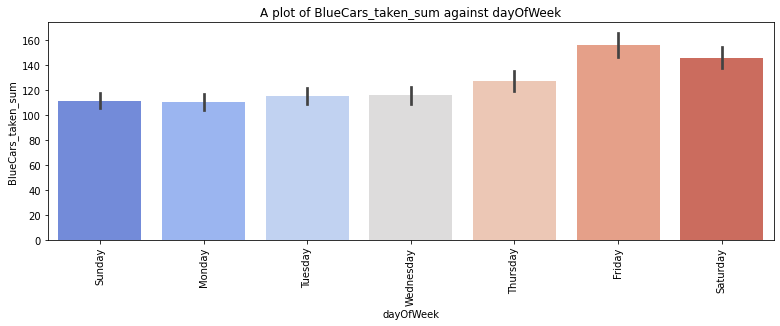

In [237]:
# This plot checks the relationship in the Blue cars taken per day
relationship(Autolib_df1,"dayOfWeek","BlueCars_taken_sum",'coolwarm')
# Friday records the day with the highest blue car count as compared to other days

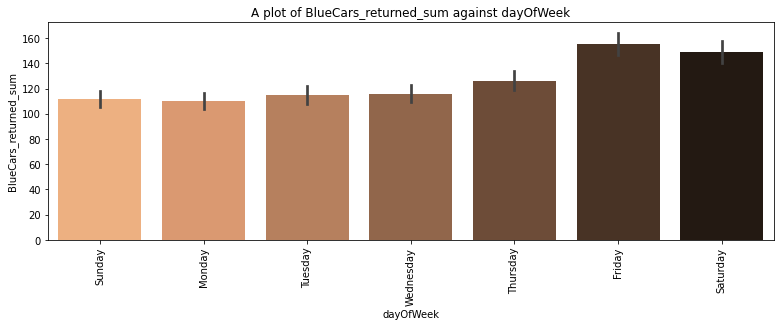

In [238]:
# This plot checks the relationship in the Blue cars returned per day
relationship(Autolib_df1,"dayOfWeek","BlueCars_returned_sum",'copper_r')
# Friday records to have a high number of counts in terms of cars returned

In [239]:
# A function to check the trend in time when the blue cars were taken
def linear_relationship(data,col_x,col_y,hue):
  plt.figure(figsize=(13,10))
  sns.lineplot(x=col_x, y=col_y, data=data,hue=hue)
  plt.xticks(rotation=90);
  plt.ylabel(col_y)
  plt.title("A plot of "+format(col_y)+" against "+format(col_x))

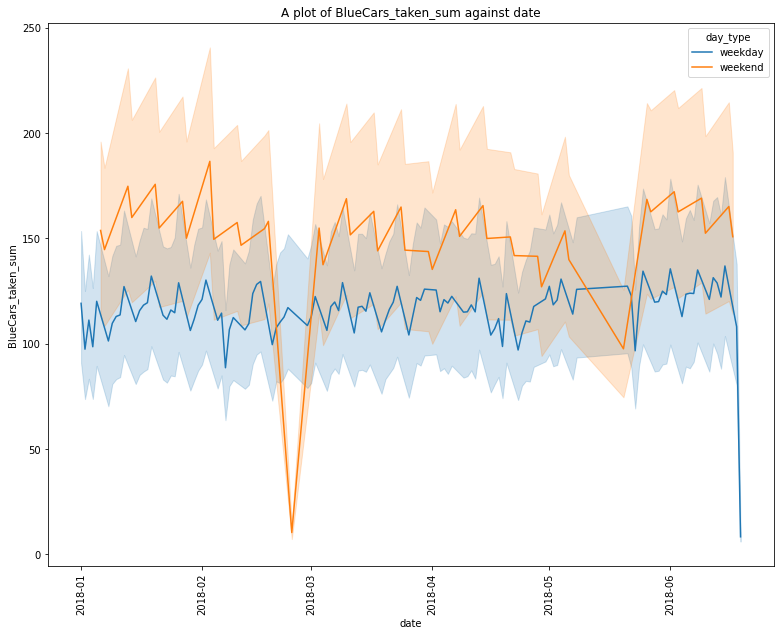

In [240]:
# The blue car taken count in week days as compared to weekends
linear_relationship(Autolib_df1,'date',"BlueCars_taken_sum",'day_type')

## 4.) Hypothesis testing Proceedure

### 1. Checking for significant difference in the blue cars taken in different locations

In [241]:
# Checking the distribution in my locations of interest ie:Postalcodes 75015,75017
Location_1=Autolib_df1[Autolib_df1['Postal code']==75015]
Location_1
Location_2=Autolib_df1[Autolib_df1['Postal code']==75017]
Location_2

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
2496,75017,2018-01-01,Sunday,weekday,634,671
2497,75017,2018-01-02,Monday,weekday,548,542
2498,75017,2018-01-03,Tuesday,weekday,638,616
2499,75017,2018-01-04,Wednesday,weekday,553,534
2500,75017,2018-01-05,Thursday,weekday,705,703
...,...,...,...,...,...,...
2647,75017,2018-06-15,Thursday,weekday,766,753
2648,75017,2018-06-16,Friday,weekend,859,891
2649,75017,2018-06-17,Saturday,weekend,729,775
2650,75017,2018-06-18,Sunday,weekday,650,639


Location 1.

In [242]:
# Importing libraries to plot my Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
def normality(data,column):
  qq=qqplot(data[column], line='s')
  qq=pyplot.show()
  return qq

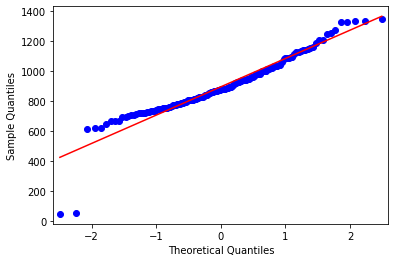

In [243]:
# Thesting the normality of location 1: Postal code:75015
normality(Location_1,'BlueCars_taken_sum')
# The distribution of my population follows a normal distribution with a slight variation at the beggining.

Location 2

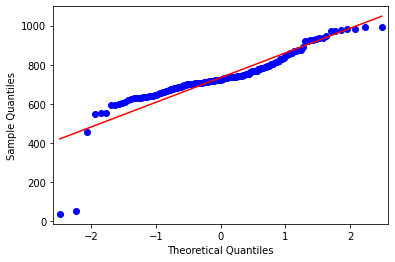

In [244]:
# Thesting the normality of location 1: Postal code:75017
normality(Location_2,'BlueCars_taken_sum')
# The distribution of my population follows a normal distribution with a slight variation at the beggining.

*  Using a significance level of 0.05 and a sample size of 156 points
*  The comparison between the two groups warrants a z test of the sample means.
*  Since we are comparing the relationship between two samples. A two tailed test is appropriate.


Test statistic 


In [245]:
# A function to tabulate the test statistic of two sample means
def Z_test(X1, X2, sigma1, sigma2, N1, N2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval

In [246]:
# Checking the distribution of cars in the two locations,standard deviastion and the sample size for the two parameters we intend to comapre
Loc_1, Loc_2 = Location_1['BlueCars_taken_sum'].mean(),Location_2['BlueCars_taken_sum'].mean()
sd1, sd2 = Location_1['BlueCars_taken_sum'].std(),Location_2['BlueCars_taken_sum'].std()
n1, n2 = Location_1['BlueCars_taken_sum'].shape[0], Location_2['BlueCars_taken_sum'].shape[0]
# It is important to note that the values are discrete..
z, p = Z_test(Loc_1, Loc_2, sd1, sd2, n1, n2)

z_score = np.round(z,8)
print('The z score is',z_score)
p_val = np.round(p,6)
print('The p_value is',p_val)
alpha_level=0.05
if (p_val<alpha_level):
    print('Reject Null Hypothesis : There is a Significant difference in the cars taken in the two locations')
else:
  print('Do not reject Null Hypothesis : There id NO Significant difference in the cars taken in the two locations')


The z score is 8.91149554
The p_value is 0.0
Reject Null Hypothesis : There is a Significant difference in the cars taken in the two locations


## 5.) Hypothesis  testing results

*  We Null hypothesis was rejected
* There is a significant difference in the cars taken in Location 1 and Location 2 as described above.
* It is also safe to conclude that the mean difference observed is statistically significant.
* The Zstatistic for the test was:8.91149554. 
* The probability of observing such a test statistic by chance ,obtaining an equally or more extreme test statistic if the null hypothesis was true was,P=0.0 which was lower than the significance level.

Point estimate

The mean was used as our point estimate since the columns contain the aggregate of the cars taken daily.

In [247]:
sample_mean=sample_df['BlueCars_taken_sum'].mean()
print(sample_mean)
# Population mean of the sum of blue cars taken
pop_mean=Autolib_df1['BlueCars_taken_sum'].mean()
print(pop_mean)
Difference =pop_mean-sample_mean
Difference

125.21076846555583
125.92695057506994


0.7161821095141079

Confidence Interval

In [248]:
# Using a 95% confidence interval the proportion of the locations in as follows.
sample_df=Autolib_df1.sample(frac=0.5)
sample_df
# Sample mean of the sum of Blue cars taken in the entire population
sample_mean=sample_df['BlueCars_taken_sum'].mean()
print(sample_mean)
# Population mean of the sum of blue cars taken
pop_mean=Autolib_df1['BlueCars_taken_sum'].mean()
print(pop_mean)
# Calculating the standard error of our mean
sample_size=sample_df['BlueCars_taken_sum'].shape[0]
std_error = Autolib_df1['BlueCars_taken_sum'].std() / np.sqrt(sample_size)
print(std_error)
# Our chosen confidence interval(95%) in the mean of the blue cars taken 
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)
# We are 95 % confident that our Population mean of the Blue cars taken lies between 121 and 129 .. with a margin of error pf 2.067

126.21337975627954
125.92695057506994
2.0677115372821797


(122.16073961278852, 130.26601989977055)

## 6.) Discussion of Test Sensitivity

* The test was conducted on the Sum of Blue Cars taken per day in two specific locations Postalcode:75015 and 75017
* The evidence was strong enough for us to Reject Ho:Mean(location1)!=Mean(Location2)
* The significance level ie.0.05 was used to give the probability of arriving at false positive.
* Beta is set at 10% to be our threshhold for arriving at a false negative.
* Increasing my sample size would intern lower the pvalue thus strengthening the Probability of Rejecting the Null hypothesis given that its false(Power).




In [249]:
# Calculating Statistical Power
# Setting my Beta at 10% (Probability of a false negative)
Beta=0.1
Power=1-Beta
Power

0.9